<a href="https://colab.research.google.com/github/And1030/And1030/blob/main/Regresi%C3%B3n_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color="#113D68" size=4>Proyecto de regresión</font></h1>
</div>

---
<a id="section0"></a>
# <font color="#004D7F" size=6> Paquetes a instalar </font>

In [1]:
!pip install tensorflow-datasets

In [2]:
import tensorflow_datasets as tfds

In [ ]:
# Restart the kernel

In [ ]:
pip install --upgrade tensorflow

In [3]:
import tensorflow as tf
# Eliminar warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [4]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 25.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.2 which is incompatible.


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. Topología de linea base</font>

modelo de red neuronal para regresión.

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Cargar el archivo base
dataframe = pd.read_csv("/content/sample_data/housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values

#Dividir os datos
#X para los datos (variables) de entrada
#Y para los datos (variables)  de salida

X = dataset[:,0:13]
y = dataset[:,13]

definir la función que crea nuestro modelo de línea de base.


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Definir el modelo base
def baseline_model():
  # creacion del modelo
  model=Sequential()
  model.add(Dense(13,input_dim=13,activation='relu'))
  model.add(Dense(1))
  # Compilar el modelo
  model.compile(loss='mean_squared_error',optimizer='adam')
  return model

model = baseline_model()

# evaluar el modelo
estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold=KFold(n_splits=10)
results=cross_val_score(estimator,X,y,cv=kfold)
#print("Linea base: %.2f (%.2f) MSE"(results.mean(),results.std()))
print("Linea base: %.2f (%.2f) MSE" % (results.mean(), results.std()))

# Fit the model
history=model.fit(X,y,validation_split=0.33,epochs=200,batch_size=15,verbose=0)

# list all data in history
print(history.history.keys())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Linea base: -0.17 (0.70) MSE
dict_keys(['loss', 'val_loss'])


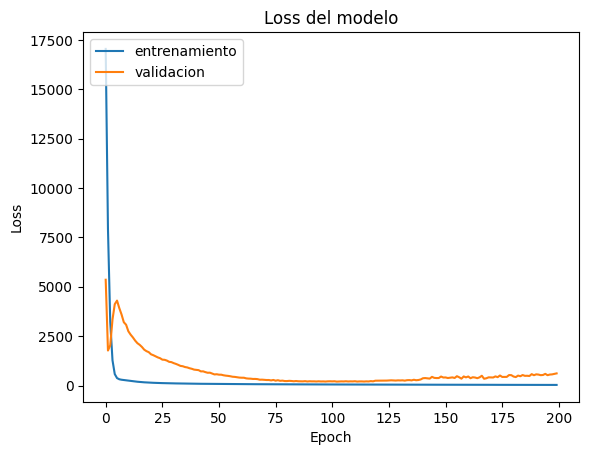

In [8]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss del modelo')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['entrenamiento','validacion'],loc='upper left')
plt.show()




---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Optimizar el rendimiento con procesamiento de datos</font>

usar el marco de trabajo Pipeline para realizar la **estandarización** durante el proceso de evaluación del modelo, dentro de cada fold.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# evaluar el modelo con un conjunto de datos estandarizado
estimators=[]
estimators.append(('standarize',StandardScaler()))
estimators.append(('NN', KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold=KFold(n_splits=10)
results=cross_val_score(pipeline,X,y,cv=kfold)
#print("Linea base: %.2f (%.2f) MSE"(results.mean(),results.std()))
print("Estandarizado: %.2f (%.2f) MSE" % (results.mean(), results.std()))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Estandarizado: 0.30 (0.77) MSE


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. Ajuste de la toplogía</font>


evaluar topologías (más profunda y amplia) para mejorar el rendimiento del modelo.

<a id="section3.1"></a>
# <font color="#004D7F" size=5>3.1. Evaluar una topología más profunda</font>

Agregar más capas para hacerla más profunda.


In [ ]:
# modelo
def larger_model():
  # create model
  model=Sequential()
  model.add(Dense(13,input_dim=13,activation='relu'))
  model.add(Dense(6,activation='relu'))
  model.add(Dense(1))
  # Compilar el modelo
  model.compile(loss='mean_squared_error',optimizer='adam')
  return model

# evaluar el modelo con un conjunto de datos estandarizado
estimators=[]
estimators.append(('standarize',StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=larger_model, epochs=50, batch_size=5, verbose=0)))
kfold=KFold(n_splits=10)
results=cross_val_score(estimator,X,y,cv=kfold)
#print("Linea base: %.2f (%.2f) MSE"(results.mean(),results.std()))
print("Deep NN: %.2f (%.2f) MSE" % (results.mean(), results.std()))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Deep NN: -0.36 (1.09) MSE


<a id="section3.2"></a>
# <font color="#004D7F" size=5>3.2. Evaluar una topología más grande</font>

In [ ]:
# modelo
def wider_model():
     # create model
  model=Sequential()
  model.add(Dense(30,input_dim=13,activation='relu'))
  model.add(Dense(46,activation='relu'))
  model.add(Dense(1))
  # Compilar el modelo
  model.compile(loss='mean_squared_error',optimizer='adam')
  return model

# evaluar el modelo con un conjunto de datos estandarizado
estimators=[]
estimators.append(('standarize',StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=wider_model, epochs=300, batch_size=5, verbose=0)))
kfold=KFold(n_splits=10)
results=cross_val_score(estimator,X,y,cv=kfold)
#print("Linea base: %.2f (%.2f) MSE"(results.mean(),results.std()))
print("Deep NN: %.2f (%.2f) MSE" % (results.mean(), results.std()))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Deep NN: -0.59 (1.45) MSE


<a id="section4"></a>
# <font color="#004D7F" size=6>Dropout en capas ocultas</font>

In [9]:
from keras.layers import Dropout
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# define wider model
def wider_model():
     # create model
  model=Sequential()
  model.add(Dense(30,input_dim=13,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(46,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1))
  # Compile model
  model.compile(loss='mean_squared_error',optimizer='adam')
  return model
# evaluar el modelo
#estimator = KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)
#kfold=KFold(n_splits=10)
#results=cross_val_score(estimator,X,y,cv=kfold)
model = wider_model()
# evaluate model with standardized dataset
estimators=[]
estimators.append(('standarize',StandardScaler()))
estimators.append(('mlp', KerasRegressor(model=wider_model, epochs=300, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold=KFold(n_splits=10)
results=cross_val_score(pipeline,X,y,cv=kfold)
#print("Linea base: %.2f (%.2f) MSE"(results.mean(),results.std()))
print("Deep NN: %.2f (%.2f) MSE" % (results.mean(), results.std()))

# Fit the model
history=model.fit(X,y,validation_split=0.33,epochs=200,batch_size=15,verbose=0)

# list all data in history
print(history.history.keys())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Deep NN: 0.37 (0.56) MSE
dict_keys(['loss', 'val_loss'])


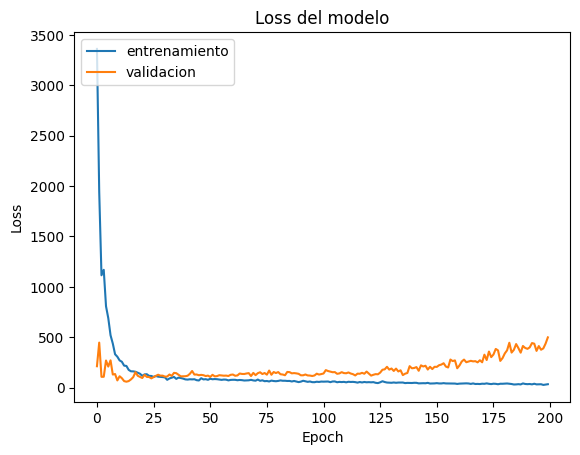

In [10]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss del modelo')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['entrenamiento','validacion'],loc='upper left')
plt.show()

<a id="section2"></a>
# <font color="#004D7F" size=6>Punto de control en el modelo</font>

In [ ]:
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:0.2f}.hdf5"
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]

# Fit the model
model.fit(X,y,validation_split=0.33,epochs=150,batch_size=10,callbacks=callbacks_list,verbose=0)

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>

<a id="section2"></a>
# <font color="#004D7F" size=6>Guardar el modelo en JSON</font>

In [ ]:


# Fit the model
model.fit(X,y,epochs=150,batch_size=10,verbose=0)
# evaluate the model
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# serialize model to JSON
model_json=model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("modelo guardado")